<a href="https://colab.research.google.com/github/juman050/Sentiment-Analysis/blob/main/Data_Preparation_part_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Loading the dataset

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/senti/Dataset_files/training.1600000.processed.noemoticon.csv', encoding='latin-1')


In [ ]:
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


# Install Libraries package

In [ ]:
!pip install symspellpy
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 43.0 MB/s eta 0:00:00
  Created wheel for editdistpy: filename=editdistpy-0.1.4-cp310-cp310-linux_x86_64.whl size=187475 sha256=5ebd396c94c6ccd0bc6d01516941078452fb7b082cfa9318866e3e42a38d46ad
  Stored in directory: /root/.cache/pip/wheels/4c/0f/10/c20d67cd765ee5b3666d759a307241bba0663135d6ee1c0072
Successfully built editdistpy
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.6 MB/s eta 0:00:00


# Import libraries that will be used for following steps

In [ ]:
import nltk, warnings, string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from symspellpy import Verbosity, SymSpell
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
df.shape

(1599999, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

In [ ]:
df.describe()

,0,1467810369
count,1.599999e+06,1.599999e+06
mean,2.000001e+00,1.998818e+09
std,2.000001e+00,1.935757e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.956916e+09
50%,4.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [ ]:
import pandas as pd
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('/content/drive/MyDrive/senti/Dataset_files/training.1600000.processed.noemoticon.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.head()


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df['target'] = df['target'].replace(4,1)

In [ ]:
df.describe()

,target,ids
count,1600000.0,1.600000e+06
mean,0.5,1.998818e+09
std,0.5,1.935761e+08
min,0.0,1.467810e+09
25%,0.0,1.956916e+09
50%,0.5,2.002102e+09
75%,1.0,2.177059e+09
max,1.0,2.329206e+09


In [ ]:
df.isnull().sum()

,0
target,0
ids,0
date,0
flag,0
user,0
text,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

,0
target,0
ids,0
date,0
flag,0
user,0
text,0


# Text Preprocessing

In [ ]:
import nltk
def text_preprocess(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english') and not word.isdigit()])

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df.text = df.text.apply(text_preprocess)

In [ ]:
stemmer = SnowballStemmer('english')

def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

In [ ]:
symspell = SymSpell()

def spelling_correction(text):
    correct_spellings = []
    for token in text.split():
        x = symspell.lookup(token,Verbosity.CLOSEST,max_edit_distance=2,include_unknown=True)[0].__str__()
        y = x.split(',')[0]
        correct_spellings.append(y)
    return ' '.join(correct_spellings)

In [ ]:
import nltk
nltk.download('wordnet')
df.text = df.text.apply(stem_words)
df.text = df.text.apply(lemmatize_words)
df.text = df.text.apply(spelling_correction)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df.loc[df.text.str.isspace()]

,target,ids,date,flag,user,text


In [ ]:
# This code replaces the values -1.0, 0.0, and 1.0 in the 'category' column of the pandas DataFrame 'df' with the corresponding string values 'Negative', and 'Positive', respectively
df.target.replace([0.0,1.0],['Negative','Positive'],inplace=True)

In [ ]:
df.to_csv('/content/drive/MyDrive/senti/Dataset_files/preprocessed_data.csv', index=False)
df = pd.read_csv('/content/drive/MyDrive/senti/Dataset_files/preprocessed_data.csv')
df.sample(5)

,target,ids,date,flag,user,text
373841,Negative,2051112929,Fri Jun 05 19:53:12 PDT 2009,NO_QUERY,StarlettePink,home friday night that kid
352911,Negative,2031404226,Thu Jun 04 09:46:07 PDT 2009,NO_QUERY,loquaciousmuse,would david carradin kill realli sad
1108931,Positive,1971811276,Sat May 30 07:57:06 PDT 2009,NO_QUERY,CrazyMadThing,bring ballack betti swallock thererav amp get ...
35902,Negative,1565431590,Mon Apr 20 06:44:35 PDT 2009,NO_QUERY,bigsimmons,manso sorri hear babe
615460,Negative,2226290400,Thu Jun 18 11:46:10 PDT 2009,NO_QUERY,ParadiseGirl83,gonna miss peopl much weekend send text


In [ ]:
#map = {0: "NEGATIVE", 1: "POSITIVE"}
#def sentiment(label):
    #return map[int(label)]

In [ ]:
#%%time
#df.target = df.target.apply(lambda x: sentiment(x))

In [ ]:
re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from symspellpy import SymSpell, Verbosity

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize preprocessing tools
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()
symspell = SymSpell()

# Regular expression for cleaning tweets
re_pattern = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9\s]+"

def preprocess_tweet(text, apply_stemming=False, apply_lemmatization=False, correct_spelling=False):
    # Remove links, user mentions, and special characters
    text = re.sub(re_pattern, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if apply_stemming:
                token = stemmer.stem(token)
            if apply_lemmatization:
                token = lemmatizer.lemmatize(token)
            tokens.append(token)

    processed_text = " ".join(tokens)

    if correct_spelling:
        corrected_tokens = []
        for token in processed_text.split():
            suggestion = symspell.lookup(token, Verbosity.CLOSEST, max_edit_distance=2, include_unknown=True)
            corrected_token = suggestion[0].term if suggestion else token
            corrected_tokens.append(corrected_token)
        processed_text = " ".join(corrected_tokens)

    return processed_text


df['text'] = df['text'].apply(lambda x: preprocess_tweet(x, apply_stemming=True, apply_lemmatization=False, correct_spelling=True))

# Display the first few rows to verify the preprocessing
print(df.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


     target         ids                          date      flag  \
0  Negative  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1  Negative  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2  Negative  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3  Negative  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4  Negative  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  switchfoot httptwitpiccom2y1zl awww bummer sho...  
1    scotthamilton  upset cant updat facebook text might cri resul...  
2         mattycus  kenichan dive mani time ball manag save rest g...  
3          ElleCTF                    whole bodi feel itchi like fire  
4           Karoli              nationwideclass behav im mad cant see  


In [ ]:
df.head()

,target,ids,date,flag,user,text
0,Negative,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot httptwitpiccom2y1zl awww bummer sho...
1,Negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant updat facebook text might cri resul...
2,Negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan dive mani time ball manag save rest g...
3,Negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole bodi feel itchi like fire
4,Negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass behav im mad cant see


# Exploratory Data Analysis

Text(0.5, 1.0, 'Dataset labels distribuition')

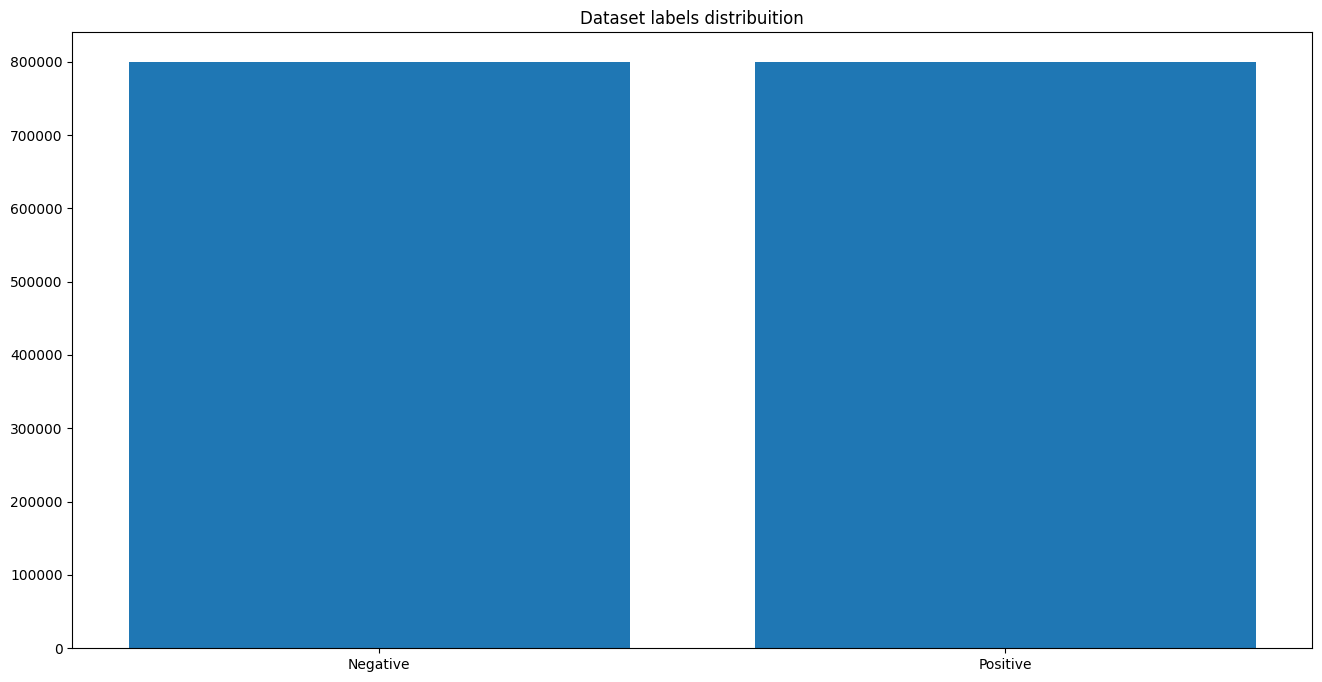

In [ ]:
from collections import Counter
cnt = Counter(df.target)

plt.figure(figsize=(16,8))
plt.bar(cnt.keys(), cnt.values())
plt.title("Dataset labels distribuition")

In [ ]:
#positive_tweets = ' '.join(list(df[df.target == 'Positive']['text']))
#negative_tweets = ' '.join(list(df[df.target == 'Negative']['text']))
# Separate positive and negative tweets
positive_tweets = df[df['target'] == 'Positive']['text']
negative_tweets = df[df['target'] == 'Negative']['text']

In [ ]:
def create_word_cloud(text, title):
    # Join all tweets into a single string, converting each element to a string
    text = ' '.join(str(tweet) for tweet in text if pd.notna(tweet))

    # Create and generate a word cloud image
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the generated image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

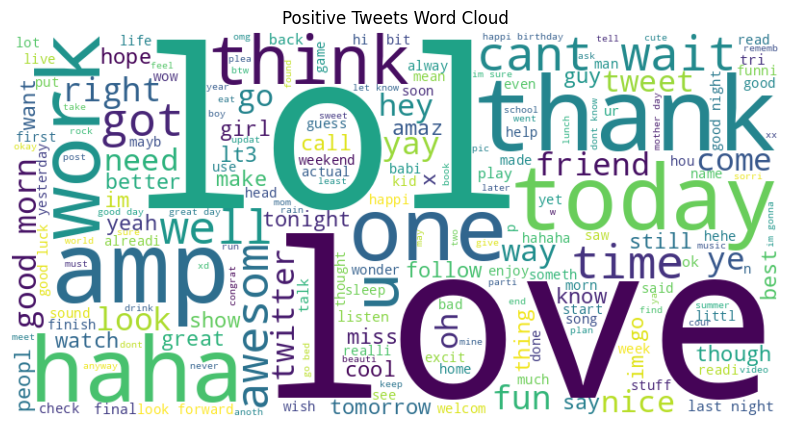

In [ ]:
create_word_cloud(positive_tweets, 'Positive Tweets Word Cloud')

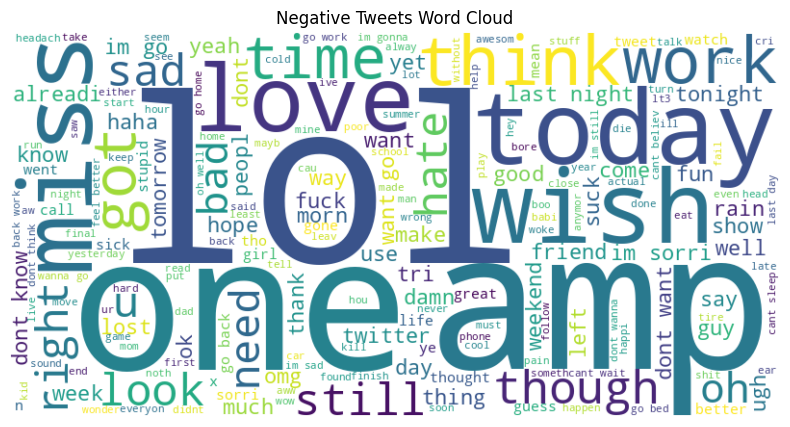

In [ ]:
create_word_cloud(negative_tweets, 'Negative Tweets Word Cloud')

#Prepare the data by splitting it into training and testing sets

In [ ]:
X = df.text
y = df.target
# Check for NaN values
print(f"Number of NaN values in 'text' column: {X.isna().sum()}")

# Remove rows with NaN values
df_clean = df.dropna(subset=['text'])
X = df_clean.text
y = df_clean.target

print(f"Shape of data after removing NaN values: {df_clean.shape}")

Number of NaN values in 'text' column: 0
Shape of data after removing NaN values: (1600000, 6)


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#TfidfVectorizer to convert text data into TF-IDF features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# Setting up the vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

# Defining models within a pipeline that includes TF-IDF vectorization
models = {
    "Logistic Regression": Pipeline([('tfidf', tfidf_vectorizer),
                                     ('classifier', LogisticRegression(random_state=42))]),
    "Linear SVM": Pipeline([('tfidf', tfidf_vectorizer),
                            ('classifier', LinearSVC(random_state=42))])
}

#Train and Evaluate these models

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

results = {}

for name, model in models.items():
    # Training the model
    model.fit(X_train,y_train)
    # Predicting the test set
    y_pred = model.predict(X_test)
    # Evaluating the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {'Accuracy': accuracy, 'Report': report}
    print(confusion_matrix(y_test,y_pred))
    print(f"{name} Accuracy: {accuracy}")
    print(classification_report(y_test,y_pred))


[[181135  58226]
 [ 49447 191192]]
Logistic Regression Accuracy: 0.77568125
              precision    recall  f1-score   support

    Negative       0.79      0.76      0.77    239361
    Positive       0.77      0.79      0.78    240639

    accuracy                           0.78    480000
   macro avg       0.78      0.78      0.78    480000
weighted avg       0.78      0.78      0.78    480000

[[179880  59481]
 [ 48969 191670]]
Linear SVM Accuracy: 0.7740625
              precision    recall  f1-score   support

    Negative       0.79      0.75      0.77    239361
    Positive       0.76      0.80      0.78    240639

    accuracy                           0.77    480000
   macro avg       0.77      0.77      0.77    480000
weighted avg       0.77      0.77      0.77    480000



#Evaluation metrics

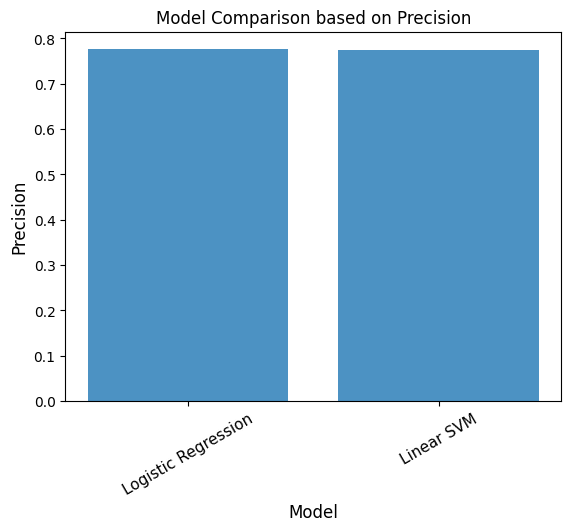

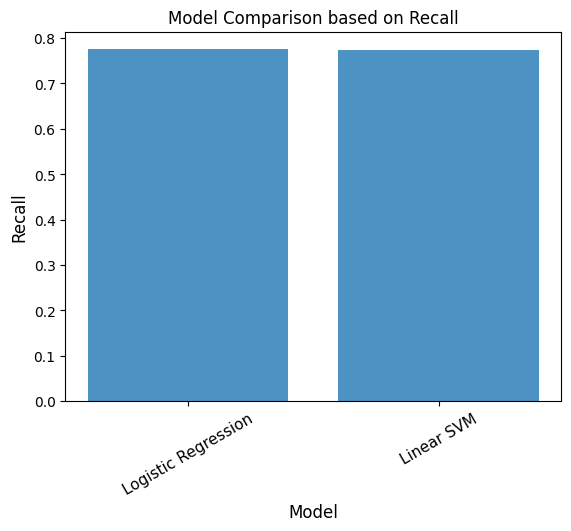

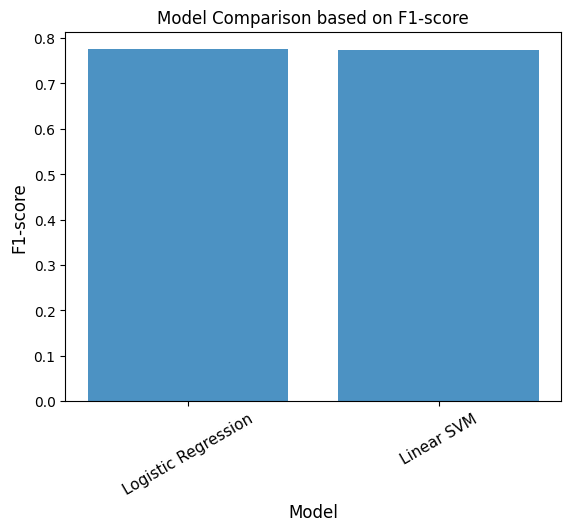

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the comparison graph
def plot_model_comparison(results, metric):
    labels = list(results.keys())
    values = [results[model]['Report']['weighted avg'][metric] for model in labels]

    index = np.arange(len(labels))
    plt.bar(index, values, alpha=0.8)
    plt.xlabel('Model', fontsize=12)
    plt.ylabel(metric.capitalize(), fontsize=12)
    plt.xticks(index, labels, fontsize=11, rotation=30)
    plt.title(f'Model Comparison based on {metric.capitalize()}')
    plt.show()

# Plotting graphs for each metric
plot_model_comparison(results, 'precision')
plot_model_comparison(results, 'recall')
plot_model_comparison(results, 'f1-score')
